### Data Cleaning

In [8]:
import pandas as pd
import numpy as np


##creating dataframe

In [9]:
data_uni = pd.read_excel("Data Uni Dissertation.xlsx")

data_uni


,Course,UCAS,25 Above,Disability,Ethnicity,Gender,British,English native Language,Parent He attendance,Polar 4 Score,...,Overall AWM,Progression,First Sit,Second Sit,Fails,No Submissions,Late Submission,Pass,Re Takes,desertion
0,BA Business Manangement Enterpreneurship and I...,no,no,no,Asian,Male,no,no,yes,4.0,...,62.000000,yes,3,3.0,0,2,2,100.000000,yes,no
1,BA Business Management,no,no,no,White,Male,no,no,yes,2.0,...,36.000000,no,1,2.0,5,3,0,83.333333,no,yes
2,BA Business Management Enterpreneurship and In...,no,no,no,Asian,Male,yes,yes,yes,4.0,...,41.000000,yes,6,0.0,0,0,0,100.000000,no,yes
3,BA Business Management,no,yes,no,White,Female,no,no,no,3.0,...,42.000000,yes,6,0.0,0,0,0,100.000000,no,yes
4,BA Business Management Enterpreneurship and In...,no,no,no,Asian,Male,yes,yes,yes,4.0,...,54.333333,yes,4,2.0,0,2,0,100.000000,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,BA,yes,no,no,Other ethnic background,Female,no,yes,no,5.0,...,45.000000,yes,6,0.0,0,0,1,100.000000,no,yes
1029,BA,yes,no,no,NaN,Male,yes,yes,yes,4.0,...,77.000000,yes,6,0.0,0,0,0,100.000000,no,no
1030,BA,no,yes,no,Asian,Female,no,no,no,3.0,...,33.000000,no,1,1.0,2,4,1,33.333333,yes,yes
1031,BA,no,yes,no,Other ethnic background,Male,no,no,yes,4.0,...,76.000000,yes,6,0.0,0,0,0,100.000000,no,no


# Exploring Data

In [10]:
#generating profiling report

from pandas_profiling import ProfileReport

In [11]:
##report = ProfileReport(data_uni)
#report.to_file(output_file= "report.html")



#Cleaning data

In [17]:
# treating inconsistent values

def trimmer(df):
    column_list = []

    for (columnName, columnData) in df.iteritems():
       
        if columnData.dtype == "object":

            df_replace = columnData.str.strip()

            column_list.append(df_replace)
        else:
            column_list.append(columnData)
            

    return (pd.DataFrame(column_list))

trimmer(data_uni)


,0,1,2,3,4,5,6,7,8,9,...,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032
Course,BA Business Manangement Enterpreneurship and I...,BA Business Management,BA Business Management Enterpreneurship and In...,BA Business Management,BA Business Management Enterpreneurship and In...,BA Business Management Enterpreneurship and In...,BA Business Management Marketing,BA Business Management Enterpreneurship and In...,BA Business Management Enterpreneurship and In...,BA Business Management,...,BA,BA,BA,BA,BA,BA,BA,BA,BA,BA
UCAS,no,no,no,no,no,yes,yes,yes,yes,yes,...,yes,yes,yes,yes,yes,yes,yes,no,no,no
25 Above,no,no,no,yes,no,no,no,no,no,no,...,no,yes,no,yes,yes,no,no,yes,yes,yes
Disability,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
Ethnicity,Asian,White,Asian,White,Asian,Asian,White,White,White,White,...,Asian,White,NaN,NaN,NaN,Other ethnic background,NaN,Asian,Other ethnic background,Other ethnic background
Gender,Male,Male,Male,Female,Male,Male,Male,Male,Male,Female,...,Male,Male,Male,Female,Male,Female,Male,Female,Male,Female
British,no,no,yes,no,yes,yes,no,yes,yes,yes,...,no,yes,yes,no,yes,no,yes,no,no,no
English native Language,no,no,yes,no,yes,yes,yes,yes,yes,yes,...,no,NaN,NaN,no,no,yes,yes,no,no,no
Parent He attendance,yes,yes,yes,no,yes,yes,no,no,no,no,...,yes,no,yes,yes,yes,no,yes,no,yes,no
Polar 4 Score,4.0,2.0,4.0,3.0,4.0,3.0,5.0,4.0,2.0,NaN,...,5.0,3.0,4.0,3.0,2.0,5.0,4.0,3.0,4.0,NaN


In [13]:
# creating a new df after trimming 
data_uni_df = trimmer(data_uni)
data_uni_df = data_uni_df.transpose( copy = True)

#saving the new data frame
data_uni_df.to_csv("data_uni.csv", index = False)
data_uni_2 = pd.read_csv("data_uni.csv")



In [14]:
#from pycaret.classification import *
#classify = setup(data= data_uni_2, target = "desertion")

In [15]:
#compare_models()

NameError: name 'compare_models' is not defined

##inputing missing values

In [18]:
#filling nan with zeros
data_uni_2.iloc[:, [24,25,29]]= data_uni_df.iloc[:, [24,25,29]].fillna(0)

data_uni_2.isna().sum()

Course                          2
UCAS                            0
25 Above                        0
Disability                      0
Ethnicity                      13
Gender                          0
British                        71
English native Language        69
Parent He attendance           37
Polar 4 Score                 118
SLC                             0
Care Leaver                   158
Student Visa                   69
Refugee                         7
London Permanent Residence      5
UCAS Points                    54
English                       160
Maths                         161
A Levels                       60
Btec                          109
Previous work                   3
Bursary                       162
Attendance                      0
AWM year 1                      0
AWM year 2                      0
AWM year 3                      0
Overall AWM                     0
Progression                     0
First Sit                       0
Second Sit    

In [21]:
#imputing missing values with most frequent values
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(data_uni_2.iloc[:, [0,4,6,7,8,9,11,12,13,14,18,19,20,21]])
data_uni_2.iloc[:, [0,4,6,7,8,9,11,12,13,14,18,19,20,21]]= imputer.transform(data_uni_2.iloc[:, [0,4,6,7,8,9,11,12,13,14,18,19,20,21]])


In [22]:
#imputing missing values with median values
data_num = data_uni_2.select_dtypes(include="number")

imputer_2 = SimpleImputer(missing_values=np.nan, strategy='median')
imputer_2.fit(data_num.iloc[:, [1,2,3]])
data_num.iloc[:, [1,2,3]] = imputer_2.transform(data_num.iloc[:, [1,2,3]])

data_uni_2.iloc[:, [15,16,17]] = data_num.iloc[:, [1,2,3]]


In [ ]:
#Generating report with clean data
#report2 = ProfileReport(data_uni_2)
#report2.to_file(output_file= "report2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# pycaret experiment with clean data
from pycaret.classification import *
#classify = setup(data= data_uni_2, target = "desertion")



,Description,Value
0,session_id,8491
1,Target,desertion
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(1033, 36)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,24
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
#compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9820,0.9927,0.9255,0.9559,0.9386,0.9281,0.9294,0.0820
et,Extra Trees Classifier,0.9806,0.9945,0.8982,0.9718,0.9321,0.9209,0.9228,0.1320
ada,Ada Boost Classifier,0.9779,0.9919,0.9173,0.9390,0.9258,0.9128,0.9144,0.0520
lda,Linear Discriminant Analysis,0.9765,0.9941,0.9073,0.9357,0.9201,0.9063,0.9072,0.0090
lightgbm,Light Gradient Boosting Machine,0.9765,0.9919,0.9073,0.9359,0.9201,0.9063,0.9073,0.0410
rf,Random Forest Classifier,0.9764,0.9938,0.8791,0.9642,0.9164,0.9028,0.9062,0.1180
knn,K Neighbors Classifier,0.9737,0.9874,0.9436,0.8921,0.9150,0.8995,0.9015,0.0160
ridge,Ridge Classifier,0.9737,0.0000,0.8700,0.9535,0.9070,0.8918,0.8948,0.0060
lr,Logistic Regression,0.9668,0.9920,0.8800,0.9019,0.8882,0.8688,0.8706,0.5380
dt,Decision Tree Classifier,0.9599,0.9382,0.9073,0.8464,0.8731,0.8494,0.8520,0.0060


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8491, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#Encoding Features

In [23]:
#Encoding dependent Variable
from sklearn.preprocessing import LabelEncoder
from collections import Counter

le = LabelEncoder()
y = le.fit_transform(data_uni_2["desertion"])
Counter(y)

Counter({0: 874, 1: 159})

In [24]:
#Encoding independet variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

X = data_uni_2.iloc[:, 0:35]
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse= False),[0,1,2,3,4,5,6,7,8,10,11,12,13,14,18,19,20,21,27,34] )], remainder='passthrough')
#ct2 = ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),[9] )], remainder='passthrough')
#X = np.array(ct2.fit_transform(X))
#X = np.array(ct.fit_transform(X))

#print(X)



X_cat = X.select_dtypes(exclude="number")
#names =df_cat.columns.tolist()
enc = OneHotEncoder(handle_unknown= "ignore", sparse = False)
X_cat= np.array(enc.fit_transform(X_cat))
X_cat = pd.DataFrame(X_cat )




#X_cat.info()


In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_num = X.select_dtypes(include="number")
a = sc.fit_transform(X_num.to_numpy())
X_num = pd.DataFrame(a)

X_num_cat = pd.concat((X_num, X_cat), axis =1)


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#Counter(y)
#oversample = SMOTE()
#X_num_cat, y = oversample.fit_resample(X_num_cat, y)
##counter = Counter(y)

#print(counter)

Counter({0: 874, 1: 874})


In [26]:
 #Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_num_cat, y, test_size = 0.3, random_state = 1, stratify = y)

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (1033, 36)
    Loaded train data. Shape = (1033, 36)
    Some column names had special characters which were removed...
loading the entire test dataframe - there is no nrows limit applicable #########
Dataname input must be a filename with path to that file or a Dataframe
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ##########

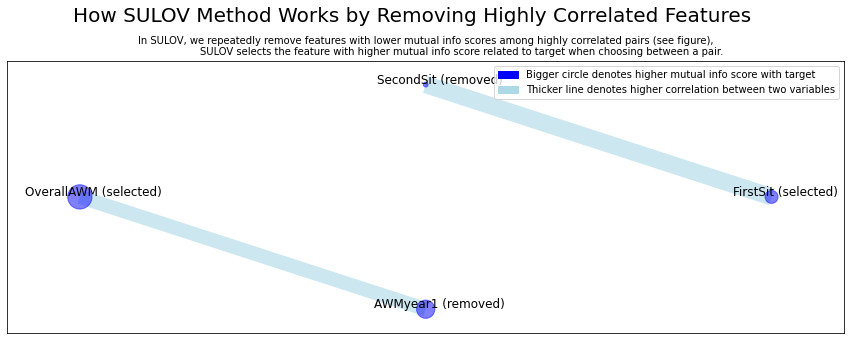

Time taken for SULOV method = 1 seconds
    Adding 20 categorical variables to reduced numeric variables  of 13
Final list of selected vars after SULOV = 33
Readying dataset for Recursive XGBoost by converting all features to numeric...
    there were no mixed data types or object columns that errored. Data is all numeric...
Shape of train data after pruning = (1033, 36)
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 33 
    XGBoost version: 1.6.1
Number of booster rounds = 100
        using 33 variables...
            Time taken for regular XGBoost feature selection = 0 seconds
        using 26 variables...
            Time taken fo

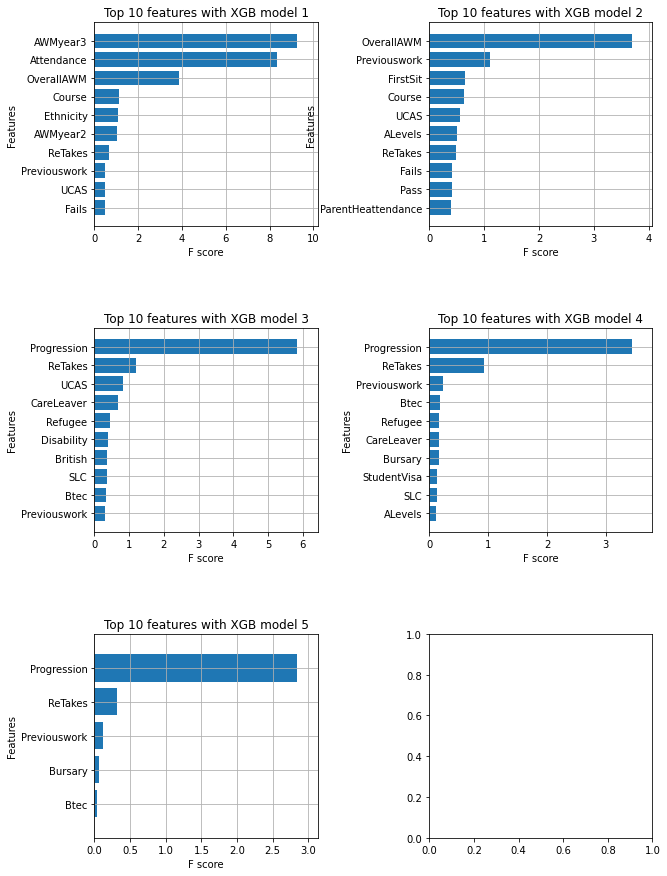

            Total time taken for XGBoost feature selection = 2 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 23 important features:
['AWMyear3', 'Attendance', 'OverallAWM', 'Course', 'Ethnicity', 'AWMyear2', 'ReTakes', 'Previouswork', 'UCAS', 'Fails', 'FirstSit', 'ALevels', 'Pass', 'ParentHeattendance', 'Progression', 'CareLeaver', 'Refugee', 'Disability', 'British', 'SLC', 'Btec', 'Bursary', 'StudentVisa']

    Time taken for feature selection = 3 seconds
Returning 2 dataframes: dataname and test_data with 23 important features.


In [38]:
from featurewiz import featurewiz


#X_num_cat
#type(X_num_cat)
#np.random.seed(26)
#data_x_y  = pd.concat([X_num_cat, pd.Series(y)], axis =1)

target = "desertion"

features, train = featurewiz(data_uni_2, target, corr_limit=0.7, verbose =2, sep=",", header= 0, test_data= 2, feature_engg= 2, category_encoders="")

In [39]:
print(features)

['AWM year 3', 'Attendance', 'Overall AWM', 'Course', 'Ethnicity', 'AWM year 2', 'Re Takes', 'Previous work', 'UCAS', 'Fails', 'First Sit', 'A Levels', 'Pass', 'Parent He attendance', 'Progression', 'Care Leaver', 'Refugee', 'Disability', 'British', 'SLC', 'Btec', 'Bursary', 'Student Visa']
